<a href="https://colab.research.google.com/github/ROrodrigp/ProgramacionCienciaDatos/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##PERCEPTRON##

import numpy as np

class Perceptron(object):
  """ docstring de la clase """
  def __init__(self, eta = 0.01, n_iter = 50, random_state=1):
    """ docstring del constructor"""
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state


  def fit(self, x, y ):
    """Ajuste = aprendizaje """
    rgen = np.random.RandomState(self.random_state)
    if self.random_state is None:
      self.w_ = np.zeros(1+len(x[0]))
    else:
      self.w_ = rgen.normal(loc = 0.0, scale = 0.1, size=1+x.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0 
      for xi, yi in zip(x,y):
        update = self.eta * (yi - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update 
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  
  def net_input(self, x):
    return np.dot(x, self.w_[1:]) + self.w_[0]

  def predict(self, x):
    return np.where(self.net_input(x) >= 0.0,1,-1)




In [ ]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([1,1,1,-1])

ppn = Perceptron(n_iter = 6, eta = 0.1, random_state= None)
ppn.fit(x,y)
print('Pesos: ',ppn.w_)

Pesos:  [ 0.4 -0.4 -0.2]


In [ ]:
x = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
y = np.array([1,1,1,-1])

ppn = Perceptron(n_iter = 6, eta = 0.1, random_state= None)
ppn.fit(x,y)
print('Pesos: ',ppn.w_)

Pesos:  [ 0.2 -0.6 -0.6  0.2]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Iris 
df = pd.read_csv('https://bit.ly/38XWXS4', header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
x = df.iloc[0:100, [0,2]].values
y = df.iloc[0:100, 4]
y = np.array(np.where(y=='Iris-setosa',-1,1))
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

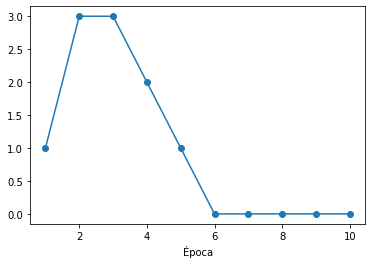

In [ ]:
ppn = Perceptron(eta = 0.1, n_iter=10)
ppn.fit(x,y)
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker = 'o')
plt.xlabel('Época')
plt.show()

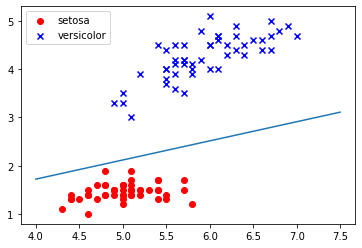

In [ ]:
x1 = np.linspace(4,7.5,2)
x2 = -(ppn.w_[0] + ppn.w_[1]*x1) / ppn.w_[2]
plt.plot(x1,x2)


regs = y == -1
x1 = x[regs][:,0]
x2 = x[regs][:,1]
plt.scatter(x1,x2, c = 'r', marker = 'o', label = 'setosa')


regs = y == 1
x1 = x[regs][:,0]
x2 = x[regs][:,1]
plt.scatter(x1,x2, c = 'b', marker = 'x', label = 'versicolor')

plt.legend()
plt.show()

In [ ]:
# Función para graficar
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
  colors = np.array(['lime', 'red', 'blue'])
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # Superficies de decisión
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution)) 
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(), xx2.max())
   # Conjuntos de cada 
  plt.scatter(X[:,0], X[:,1], alpha=0.9, c=colors[y.astype(int)], edgecolor='black')

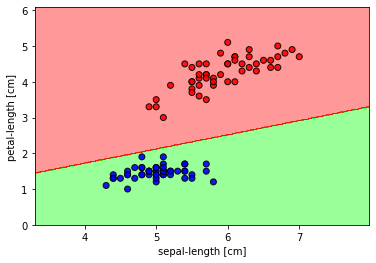

In [ ]:
plot_decision_regions(x, y, classifier=ppn) 
plt.xlabel('sepal-length [cm]') 
plt.ylabel('petal-length [cm]')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


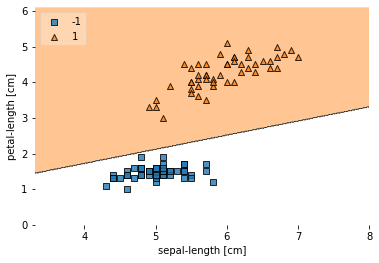

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(x, y, clf= ppn, legend = 2)

plt.xlabel('sepal-length [cm]')
plt.ylabel('petal-length [cm]')
plt.show()

In [ ]:
from sklearn import datasets
import numpy as np 

iris = datasets.load_iris()
iris.target[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x = iris.data[:,[2,3]]
y = iris.target[:]
np.unique(y)

array([0, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, stratify = y, random_state = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 2) (105,)
(45, 2) (45,)


In [ ]:
print('En y   :', np.bincount(y))
print('En y_train :', np.bincount(y_train))
print('En y_test:', np.bincount(y_test))

En y   : [50 50 50]
En y_train : [35 35 35]
En y_test: [15 15 15]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
#Perceptron de sklearn 
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter = 40,random_state= 1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = ppn.predict(X_test_std)
print('Errores: ', (y_test-y_pred).sum())

Errores:  -3


In [ ]:
ppn.coef_

array([[-1.0655204 , -1.18367281],
       [ 3.17903271, -3.67088403],
       [ 4.44427179,  3.39744063]])

In [ ]:
print('Exactitud: ', ppn.score(X_test_std ,y_test))

Precisión:  0.8888888888888888


In [ ]:
from sklearn.metrics import accuracy_score
print('Exactitud: ',accuracy_score(y_test, y_pred))

Exactitud:  0.8888888888888888


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


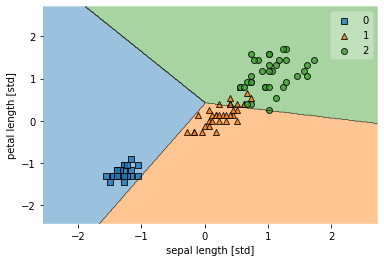

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


plot_decision_regions(X_train_std, y_train, clf=ppn)

plt.xlabel('sepal length [std]')
plt.ylabel('petal length [std]')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


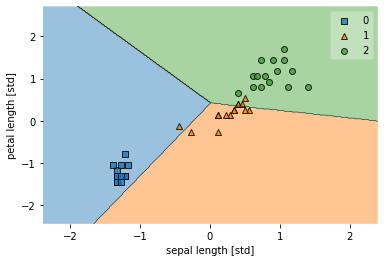

In [ ]:
plot_decision_regions(X_test_std, y_test, clf=ppn)

plt.xlabel('sepal length [std]')
plt.ylabel('petal length [std]')
plt.show()

In [ ]:
#Regresión Logística
import numpy as np 
import matplotlib.pyplot as plt

#sigmoide
def sigmoide(z):
  return 1.0/(1+np.exp(-z))

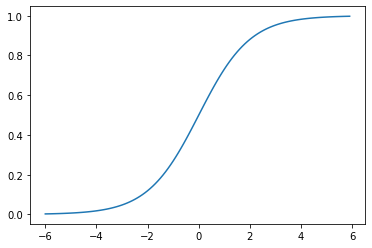

In [ ]:
z = np.arange(-6,6,0.1)
phi_z = sigmoide(z)
plt.plot(z, phi_z)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 100.0, random_state = 1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_test_std)
print('Errores: ',(y_test-y_pred).sum())
print('Exactitud', lr.score(X_test_std, y_test))

Errores:  1
Exactitud 0.9777777777777777


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


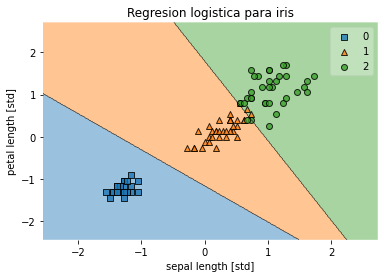

In [ ]:
plot_decision_regions(X_train_std, y_train, clf = lr)

plt.xlabel('sepal length [std]')
plt.ylabel('petal length [std]')
plt.title('Regresion logistica para iris')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


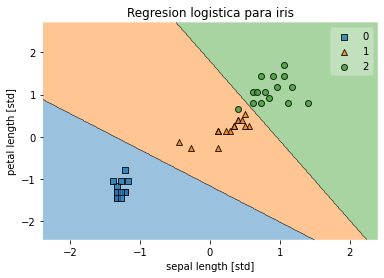

In [ ]:
plot_decision_regions(X_test_std, y_test, clf = lr)

plt.xlabel('sepal length [std]')
plt.ylabel('petal length [std]')
plt.title('Regresion logistica para iris')
plt.show()

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('https://bit.ly/3jJ1xsu', header = 0 )
data.head()

,x1,x2,y
0,-0.181268,-0.481095,0
1,-0.413236,-0.991172,1
2,0.317451,-0.809899,0
3,0.494777,0.485282,0
4,0.958661,0.501620,1


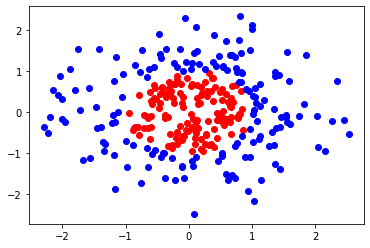

In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

color = ['r','b']
for i,c in enumerate(color):
  regs = y ==i
  x1 = X[regs][:,0]
  x2 = X[regs][:,1]
  plt.scatter(x1,x2,c=c, label ='CLASE'+str(i))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [ ]:
modelo = LogisticRegression()
modelo.fit(X_train**2, y_train)
#Elipse
theta = [*modelo.intercept_, *modelo.coef_[0]]
theta

[-4.199805022644805, 3.678003157029244, 3.983389118119927]

In [ ]:
lim = np.sqrt(abs(theta[0]/theta[1]))
print(lim)

x1 = np.linspace(-lim, lim, 1000)
x2 = ((theta[0]+theta[1]*x1**2)/(theta[2])

In [ ]:
L